# AAL Sales Analysis Report for the Fourth Quarter of 2020

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime

In [2]:
## 1. Data Wrangling
# first load the data
Sales_data=pd.read_csv('AusApparalSales4thQrt2020.csv')

In [3]:
Sales_data.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [4]:
# Code to handle missing data
Sales_data.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [5]:
Sales_data.shape

(7560, 6)

In [6]:
Sales_data.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [7]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [8]:
Sales_data.corr

<bound method DataFrame.corr of              Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]>

# Normalize the data (example for Sales and Unit columns)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
Sales_data[['Sales', 'Unit']] = scaler.fit_transform(Sales_data[['Sales', 'Unit']])

In [11]:
# Save the cleaned and normalized data
Sales_data.to_csv('Cleaned_Normalized_AusApparalSales4thQrt2020.csv', index=False)

In [12]:
Sales_data.Sales

0       0.095238
1       0.095238
2       0.031746
3       0.206349
4       0.015873
          ...   
7555    0.190476
7556    0.206349
7557    0.206349
7558    0.142857
7559    0.174603
Name: Sales, Length: 7560, dtype: float64

In [13]:
Sales_data.Unit

0       0.095238
1       0.095238
2       0.031746
3       0.206349
4       0.015873
          ...   
7555    0.190476
7556    0.206349
7557    0.206349
7558    0.142857
7559    0.174603
Name: Unit, Length: 7560, dtype: float64

# GroupBy example with column State & Group

In [14]:
# GroupBy example with correct column names
grouped_data = Sales_data.groupby(['State', 'Group'])
grouped_data.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873
...,...,...,...,...,...,...
159,2-Oct-2020,Morning,TAS,Seniors,0.126984,0.126984
160,2-Oct-2020,Afternoon,TAS,Kids,0.142857,0.142857
161,2-Oct-2020,Afternoon,TAS,Men,0.047619,0.047619
162,2-Oct-2020,Afternoon,TAS,Women,0.031746,0.031746


# descriptive statistical analysis

In [15]:
# Perform descriptive statistical analysis
sales_stats = Sales_data['Sales'].describe()
sales_stats = Sales_data['Unit'].describe()

In [16]:
sales_stats
sales_stats

count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Unit, dtype: float64

# Highest and Lowest Sales Groups

In [17]:
# Identify the group with the highest and lowest sales
highest_sales_state = Sales_data.groupby('State')['Sales'].sum().idxmax()
lowest_sales_state = Sales_data.groupby('State')['Sales'].sum().idxmin()
print(f'Highest sales state: {highest_sales_state}')
print(f'Lowest sales state: {lowest_sales_state}')

Highest sales state:  VIC
Lowest sales state:  WA


In [18]:
highest_sales_group = Sales_data.groupby('Group')['Sales'].sum().idxmax()
lowest_sales_group = Sales_data.groupby('Group')['Sales'].sum().idxmin()
print(f'Highest sales group: {highest_sales_group}')
print(f'Lowest sales group: {lowest_sales_group}')

Highest sales group:  Men
Lowest sales group:  Seniors


In [19]:
# Convert 'Date' column to datetime
Sales_data['Date'] = pd.to_datetime(Sales_data['Date'])

# Weekly, Monthly, and Quarterly Reports

In [20]:
# Generate reports
weekly_report = Sales_data.resample('W', on='Date').sum()
monthly_report = Sales_data.resample('M', on='Date').sum()
quarterly_report = Sales_data.resample('Q', on='Date').sum()

In [21]:
# Save the reports
weekly_report.to_csv('Weekly_Report.csv')
monthly_report.to_csv('Monthly_Report.csv')
quarterly_report.to_csv('Quarterly_Report.csv')

# State-wise Sales Analysis

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

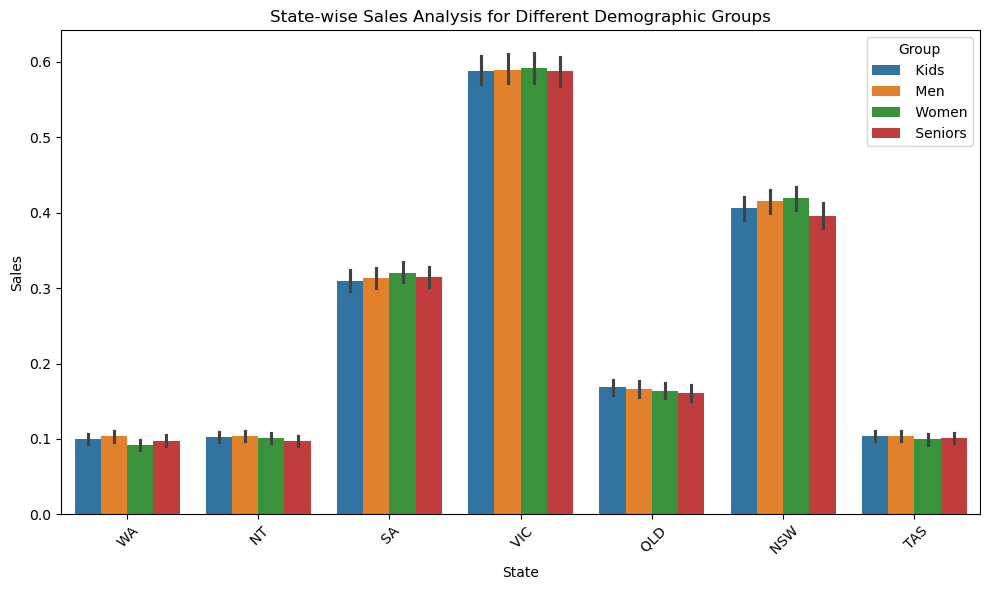

In [23]:
# State-wise sales analysis for different demographic groups
plt.figure(figsize=(10, 6))
sns.barplot(data=Sales_data, x='State', y='Sales', hue='Group')
plt.title('State-wise Sales Analysis for Different Demographic Groups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('State_wise_Sales_Analysis.png')
plt.show()

# Group-wise Sales Analysis

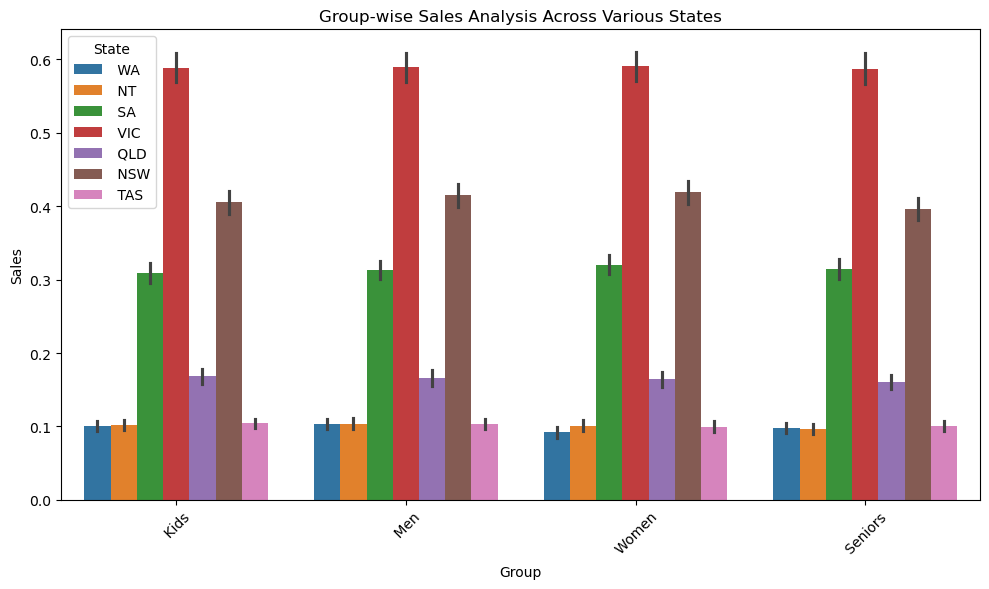

In [24]:
# Group-wise sales analysis across various states
plt.figure(figsize=(10, 6))
sns.barplot(data=Sales_data, x='Group', y='Sales', hue='State')
plt.title('Group-wise Sales Analysis Across Various States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Group_wise_Sales_Analysis.png')
plt.show()

# Time-of-the-Day Sales Analysis

In [25]:
# Inspect unique values in the Time column
print(Sales_data['Time'].unique())

[' Morning' ' Afternoon' ' Evening']


In [26]:
# Function to convert general time descriptions to a standardized time
def convert_time(time_str):
    time_str = time_str.strip().lower()  # Strip whitespace and convert to lowercase
    if time_str in ["morning"]:
        return "09:00"
    elif time_str in ["afternoon"]:
        return "15:00"
    elif time_str in ["evening"]:
        return "19:00"
    elif time_str in ["night"]:
        return "21:00"
    else:
        return time_str  # Return as-is if it's already in %H:%M format

In [27]:
# Apply the conversion function to the Time column
Sales_data['Time'] = Sales_data['Time'].apply(convert_time)

In [28]:
# Convert the cleaned Time column to datetime and extract the hour
Sales_data['Hour'] = pd.to_datetime(Sales_data['Time'], format='%H:%M').dt.hour

In [29]:
# Verify the conversion
print(Sales_data[['Time', 'Hour']].head())

    Time  Hour
0  09:00     9
1  09:00     9
2  09:00     9
3  09:00     9
4  15:00    15


In [30]:
# Group sales by the hour of the day
hourly_sales = Sales_data.groupby('Hour')['Sales'].sum().reset_index()

In [31]:
# Time-of-the-day analysis: Identify peak and off-peak sales periods
Sales_data['Hour'] = pd.to_datetime(Sales_data['Time'], format='%H:%M').dt.hour
hourly_sales = Sales_data.groupby('Hour')['Sales'].sum().reset_index()

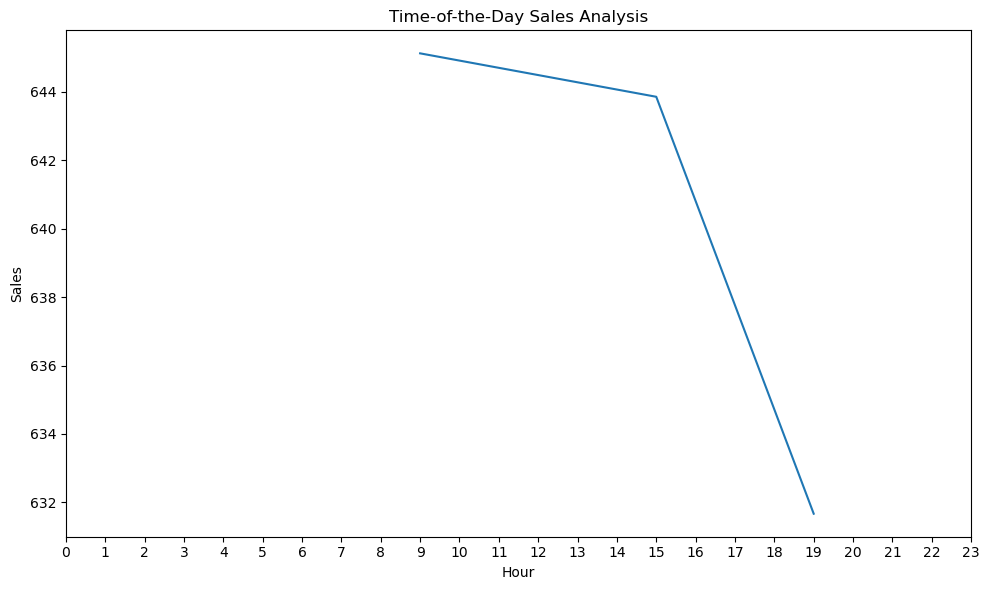

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sales, x='Hour', y='Sales')
plt.title('Time-of-the-Day Sales Analysis')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig('Time_of_Day_Sales_Analysis.png')
plt.show()

# Sales Over Time

In [33]:
# Daily, weekly, monthly, and quarterly charts
daily_sales = Sales_data.resample('D', on='Date').sum()
weekly_sales = Sales_data.resample('W-Mon', on='Date').sum()
monthly_sales = Sales_data.resample('M', on='Date').sum()
quarterly_sales = Sales_data.resample('Q', on='Date').sum()

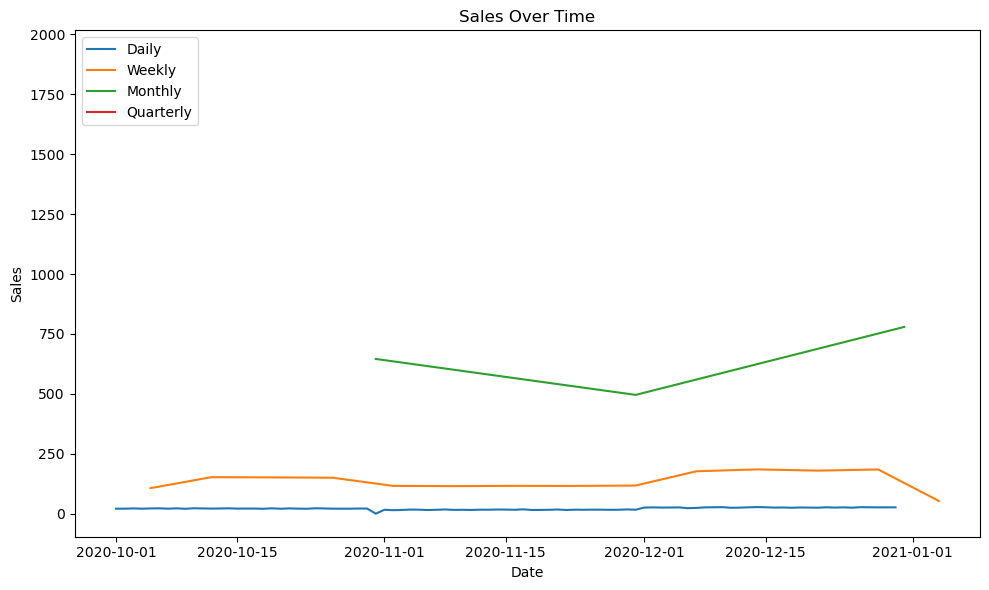

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_sales, x='Date', y='Sales', label='Daily')
sns.lineplot(data=weekly_sales, x='Date', y='Sales', label='Weekly')
sns.lineplot(data=monthly_sales, x='Date', y='Sales', label='Monthly')
sns.lineplot(data=quarterly_sales, x='Date', y='Sales', label='Quarterly')
plt.title('Sales Over Time')
plt.legend()
plt.tight_layout()
plt.savefig('Sales_Over_Time.png')
plt.show()

In [35]:
Sales_data.head()

,Date,Time,State,Group,Unit,Sales,Hour
0,2020-10-01,09:00,WA,Kids,0.095238,0.095238,9
1,2020-10-01,09:00,WA,Men,0.095238,0.095238,9
2,2020-10-01,09:00,WA,Women,0.031746,0.031746,9
3,2020-10-01,09:00,WA,Seniors,0.206349,0.206349,9
4,2020-10-01,15:00,WA,Kids,0.015873,0.015873,15


In [36]:
grouped_data.head()

,Date,Time,State,Group,Unit,Sales,Hour
0,2020-10-01,09:00,WA,Kids,0.095238,0.095238,9
1,2020-10-01,09:00,WA,Men,0.095238,0.095238,9
2,2020-10-01,09:00,WA,Women,0.031746,0.031746,9
3,2020-10-01,09:00,WA,Seniors,0.206349,0.206349,9
4,2020-10-01,15:00,WA,Kids,0.015873,0.015873,15
...,...,...,...,...,...,...,...
159,2020-10-02,09:00,TAS,Seniors,0.126984,0.126984,9
160,2020-10-02,15:00,TAS,Kids,0.142857,0.142857,15
161,2020-10-02,15:00,TAS,Men,0.047619,0.047619,15
162,2020-10-02,15:00,TAS,Women,0.031746,0.031746,15


# Recommendations and Conclusion